# Lectura de data

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finals/data categorizada.xlsx


In [23]:
data = '/kaggle/input/finals/data categorizada.xlsx'
df = pd.read_excel(data)
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
0    209.85.218.52    3.1.0.0.0   1.3.1.0.0.0   
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   

                                             Subject  Has Attachment   Size  \
0                                                NaN               0   3.03   
1  DESCANSO VACACIONAL KETTY MORALES GAMBOA MAT. ...               0  22.25   
2         Factura sin pagar, regularizar. (91083214)               0  25.42   
3  Â¡Ãšltima advertencia: En caso de falta de pag...               0   7.31   
4                             MIDIS / 230912145756/                0   2.32   

   APT Verdict  
0     phishing  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  


In [24]:
#Eliminar filas con NaN
df = df.dropna()
filas = df.shape[0]
conteo = df.groupby('APT Verdict').size()
conteo

APT Verdict
no phishing    9889
phishing       9877
dtype: int64

# Limpieza de texto

In [25]:
from bs4 import BeautifulSoup
import pandas as pd
import re


def limpiar(texto):
    texto_sincaracter = re.sub(r'[^a-zA-Z\s]', '',str(texto))
    texto_min = texto_sincaracter.lower()
    soup = BeautifulSoup(texto_min, 'html.parser')
    texto_sinhtml = soup.get_text()
    texto_limpio = ' '.join(texto_sinhtml.split())
    return texto_limpio

df['Subject_limpio'] = df['Subject'].apply(limpiar)

print(df['Subject_limpio'])

1           descanso vacacional ketty morales gamboa mat s
2                            factura sin pagar regularizar
3        ltima advertencia en caso de falta de pago su ...
4                                                    midis
5              eps pacifico melanie zenith chambi diaz dni
                               ...                        
19995    banco de credito solicitud de sctr matricula s...
19996                                                     
19997                           tu factura esta por vencer
19998    importante consulta cambio de arrendador sixti...
19999                        ya podes acceder a tu factura
Name: Subject_limpio, Length: 19766, dtype: object


In [26]:
df = df.drop('Subject', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Subject_limpio', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Subject_limpio  Has Attachment   Size  \
1     descanso vacacional ketty morales gamboa mat s               0  22.25   
2                      factura sin pagar regularizar               0  25.42   
3  ltima advertencia en caso de falta de pago su ...               0   7.31   
4                                              midis               0   2.32   
5        eps pacifico melanie zenith chambi diaz dni               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Tokenización

In [27]:
from nltk.tokenize import word_tokenize
import spacy

# Aplica la tokenización a la columna 'Subject_limpio'
df['Tokens'] = df['Subject_limpio'].apply(word_tokenize)
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Subject_limpio  Has Attachment   Size  \
1     descanso vacacional ketty morales gamboa mat s               0  22.25   
2                      factura sin pagar regularizar               0  25.42   
3  ltima advertencia en caso de falta de pago su ...               0   7.31   
4                                              midis               0   2.32   
5        eps pacifico melanie zenith chambi diaz dni               0   6.16   

   APT Verdict                                             Tokens  
1  no phishing  [descanso, vacacional, ketty, morales, gamboa,...  
2     phishing                 [factura, sin, pagar, regularizar]  
3     phishing  [ltima, ad

In [28]:
df = df.drop('Subject_limpio', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                              Tokens  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                 [factura, sin, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, en, caso, de, falta, de, ...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Eliminar stop words

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def eliminar_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['Tokens_limpios'] = df['Tokens'].apply(eliminar_stopwords)
print(df.head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                              Tokens  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                 [factura, sin, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, en, caso, de, falta, de, ...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict                                     Tokens_limpios  
1  no phishing  [descanso, vacacional,

In [30]:
df = df.drop('Tokens', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens_limpios', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Tokens_limpios  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Lematización

In [31]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 46.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [32]:
import spacy

# Carga el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

def lematizar(tokens):
    lematizar = []
    for token in tokens:
        doc = nlp(token)
        lematizar.append(doc[0].lemma_)
    return lematizar

df['Tokens_lematizados'] = df['Tokens_limpios'].apply(lematizar)
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Tokens_limpios  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict                                 Tokens_lematizados  
1  no phishing  [descanso, vacacional, ketty, moral, gamboa, m...  
2     phishing                      [factura, pagar, regularizar]  
3     phishing  [ltimo, ad

In [33]:
df = df.drop('Tokens_limpios', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens_lematizados', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [34]:
#Eliminar las filas de Tokens_lematizados que tienen vectores vacios (=[])
df = df[df['Tokens_lematizados'].apply(lambda x: len(x) > 0)]
df.shape[0]

19706

# FastText

## CBOW

In [35]:
df_ft_cbow = df.copy()
print(df_ft_cbow.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [36]:
import pandas as pd
from gensim.models import FastText

# Crear y entrenar el modelo FastText (CBOW) y construir el vocabulario
model = FastText(sentences=df_ft_cbow['Tokens_lematizados'], vector_size=50, sg=0, window=5, min_count=1, workers=4)

# Función para obtener el vector promedio de una lista de tokens
def get_vector(tokens):
    vectors = [model.wv[token] for token in tokens if token in model.wv.index_to_key]
    if vectors:
        return sum(vectors) / len(vectors)
    return [0.0] * 50  # En caso de que no haya tokens encontrados, devolver un vector de ceros

# Aplicar la función a cada fila del DataFrame
df_ft_cbow['ft_cbow'] = df_ft_cbow['Tokens_lematizados'].apply(get_vector)

# Imprimir el DataFrame resultante
print(df_ft_cbow)

             Sender IP  From (SMTP) From (Header)  \
1        209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2         62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3      136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4        13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5       148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   
...                ...          ...           ...   
19994    13.110.78.190    1.1.1.0.0   1.1.1.1.0.0   
19995     200.60.141.7    1.1.1.0.0   1.1.1.1.0.0   
19997     167.99.113.3   59.5.2.0.0   1.4.3.2.1.0   
19998      153.123.7.5    1.1.1.0.0   1.1.1.1.0.0   
19999      95.85.72.86  63.10.2.0.0  1.12.7.2.1.0   

                                      Tokens_lematizados  Has Attachment  \
1      [descanso, vacacional, ketty, moral, gamboa, m...               0   
2                          [factura, pagar, regularizar]               0   
3      [ltimo, advertencia, caso, falta, pago, paquet...               0   
4                                                [midis]   

In [37]:
df_ft_cbow = df_ft_cbow.drop('Tokens_lematizados', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'ft_cbow', 'Has Attachment', 'Size', 'APT Verdict']
df_ft_cbow = df_ft_cbow[ordenar]
print(df_ft_cbow.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_cbow  Has Attachment   Size  \
1  [-1.3428181, -0.12537615, -0.061040156, 0.4069...               0  22.25   
2  [-1.8673152, -0.06601369, -0.36379933, 0.25876...               0  25.42   
3  [-3.4805822, 0.55557615, 0.3505052, 0.8988473,...               0   7.31   
4  [-0.41104922, -0.05676074, -0.083982706, 0.083...               0   2.32   
5  [-0.9085913, -0.18119228, -0.1801713, 0.130533...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [38]:
import pandas as pd
import numpy as np

# Definir una función para convertir un vector NumPy en una lista
def numpy_vector_to_list(vector):
    return vector.tolist()

# Aplicar la función a la columna y crear una nueva columna de listas
df_ft_cbow['ft_cbow'] = df_ft_cbow['ft_cbow'].apply(numpy_vector_to_list)

# Mostrar el DataFrame resultante
print(df_ft_cbow)

             Sender IP  From (SMTP) From (Header)  \
1        209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2         62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3      136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4        13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5       148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   
...                ...          ...           ...   
19994    13.110.78.190    1.1.1.0.0   1.1.1.1.0.0   
19995     200.60.141.7    1.1.1.0.0   1.1.1.1.0.0   
19997     167.99.113.3   59.5.2.0.0   1.4.3.2.1.0   
19998      153.123.7.5    1.1.1.0.0   1.1.1.1.0.0   
19999      95.85.72.86  63.10.2.0.0  1.12.7.2.1.0   

                                                 ft_cbow  Has Attachment  \
1      [-1.3428181409835815, -0.1253761500120163, -0....               0   
2      [-1.8673151731491089, -0.06601368635892868, -0...               0   
3      [-3.4805822372436523, 0.5555761456489563, 0.35...               0   
4      [-0.4110492169857025, -0.05676073953509331, -0...   

In [39]:
# Función para agregar números de IP a vectores
def agregar_ip_a_vector(ip1, ip2, ip3, vector):
    numeros_ip1 = [float(numero) for numero in ip1.split('.')]
    numeros_ip2 = [float(numero) for numero in ip2.split('.')]
    numeros_ip3 = [float(numero) for numero in ip3.split('.')]
    
    nuevo_vector = vector + numeros_ip1 + numeros_ip2 + numeros_ip3
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame
df_ft_cbow['Concatenado_ips'] = df_ft_cbow.apply(lambda row: agregar_ip_a_vector(row['Sender IP'], row['From (SMTP)'], row['From (Header)'], row['ft_cbow']), axis=1)

# Función para agregar enteros y floats como elementos individuales en los vectores
def agregar_numero_a_vector(vector, numero):
    nuevo_vector = vector + [float(numero)]
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame para enteros
df_ft_cbow['Concatenado_total'] = df_ft_cbow.apply(lambda row: agregar_numero_a_vector(row['Concatenado_ips'], row['Has Attachment']), axis=1)

# Aplicar la función a cada fila del DataFrame para floats
df_ft_cbow['Concatenado_total'] = df_ft_cbow.apply(lambda row: agregar_numero_a_vector(row['Concatenado_total'], row['Size']), axis=1)

# Mostrar el DataFrame resultante
print(df_ft_cbow.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_cbow  Has Attachment   Size  \
1  [-1.3428181409835815, -0.1253761500120163, -0....               0  22.25   
2  [-1.8673151731491089, -0.06601368635892868, -0...               0  25.42   
3  [-3.4805822372436523, 0.5555761456489563, 0.35...               0   7.31   
4  [-0.4110492169857025, -0.05676073953509331, -0...               0   2.32   
5  [-0.9085912704467773, -0.1811922788619995, -0....               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1  no phishing  [-1.3428181409835815, -0.1253761500120163, -0....   
2     phishing  [-1.8673151731491089, -0.06601368635892868, -0...   
3     phishing  [-3.480

In [40]:
first_row = df_ft_cbow["Concatenado_total"].loc[1]
print(first_row)

[-1.3428181409835815, -0.1253761500120163, -0.061040155589580536, 0.40690964460372925, 0.8021799921989441, -0.04732903465628624, -0.9905214309692383, 0.564828097820282, -1.27279794216156, -0.07382529228925705, 0.24585315585136414, -0.5588287711143494, -0.05909159407019615, -0.062482330948114395, -0.003995793405920267, 0.638654351234436, -1.009835124015808, -0.6308589577674866, 0.42417773604393005, -1.3658477067947388, 0.23222975432872772, -0.48147979378700256, 0.3740517199039459, 0.553985595703125, -0.4738123118877411, 0.49037060141563416, -0.6097531318664551, 0.6744637489318848, -0.15062136948108673, -0.26282086968421936, 0.611956000328064, -0.7080713510513306, -0.2341461479663849, 1.1078660488128662, 0.22640292346477509, -0.24693690240383148, -0.27746787667274475, -0.3003477454185486, 0.8090367317199707, -1.6222838163375854, 0.0959307998418808, 0.7478576302528381, 0.11494551599025726, -0.04215474799275398, -0.6874362826347351, -0.891220211982727, 0.12674954533576965, 0.17400504648685

In [41]:
# Reemplazar "no phishing" por 0 y "phishing" por 1
df_ft_cbow['APT Verdict'] = df_ft_cbow['APT Verdict'].replace({'no phishing': 0, 'phishing': 1})
print(df_ft_cbow.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_cbow  Has Attachment   Size  \
1  [-1.3428181409835815, -0.1253761500120163, -0....               0  22.25   
2  [-1.8673151731491089, -0.06601368635892868, -0...               0  25.42   
3  [-3.4805822372436523, 0.5555761456489563, 0.35...               0   7.31   
4  [-0.4110492169857025, -0.05676073953509331, -0...               0   2.32   
5  [-0.9085912704467773, -0.1811922788619995, -0....               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1            0  [-1.3428181409835815, -0.1253761500120163, -0....   
2            1  [-1.8673151731491089, -0.06601368635892868, -0...   
3            1  [-3.480

### RANDOM FOREST

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_cbow['Concatenado_total'].tolist()
y = df_ft_cbow['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9954337899543378
Precision: 0.995435853942775
Recall: 0.9954337899543378
F-Score: 0.9954337970067048
Specificity: 0.9944331983805668


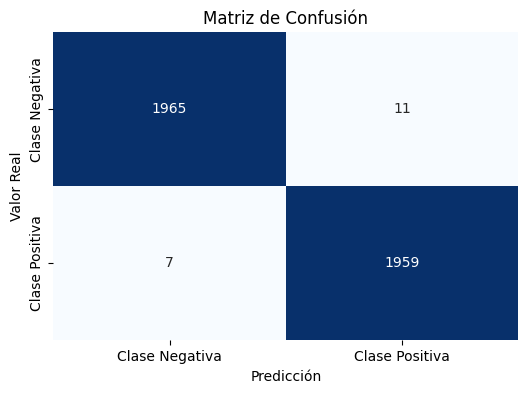

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### DECISION TREE

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_cbow['Concatenado_total'].tolist()
y = df_ft_cbow['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de división
    'max_depth': [None, 2, 5, 10],  # Profundidad máxima del árbol
    'min_samples_split': [4, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2, 4, 8]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9923896499238964
Precision: 0.9923896499238964
Recall: 0.9923896499238964
F-Score: 0.9923896499238964
Specificity: 0.9924089068825911


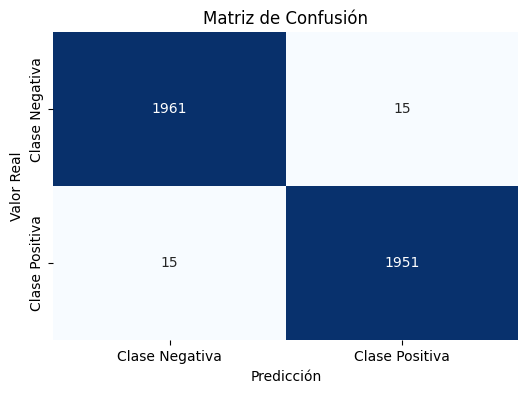

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### LOGISTIC REGRESSION

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_cbow['Concatenado_total'].tolist()
y = df_ft_cbow['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
    'max_iter': [100, 500, 1000]  # Número máximo de iteraciones
}

# Crear un modelo de Regresión Logística
logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear', random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9639776763064434
Precision: 0.9640004381849696
Recall: 0.9639776763064434
F-Score: 0.9639768973846408
Specificity: 0.9676113360323887


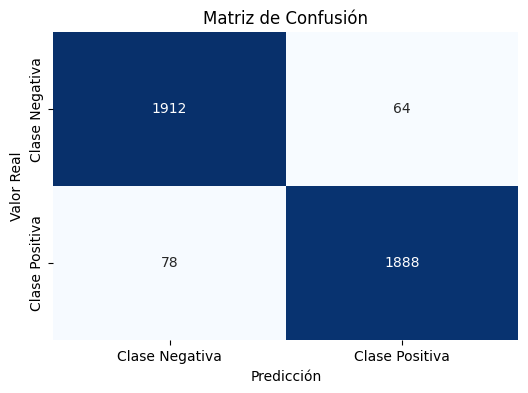

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

## SKIP-GRAM

In [48]:
df_ft_skip = df.copy()
print(df_ft_skip.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [49]:
import pandas as pd
from gensim.models import FastText

# Crear y entrenar el modelo FastText (CBOW) y construir el vocabulario
model = FastText(sentences=df_ft_skip['Tokens_lematizados'], vector_size=50, sg=1, window=5, min_count=1, workers=4)

# Función para obtener el vector promedio de una lista de tokens
def get_vector(tokens):
    vectors = [model.wv[token] for token in tokens if token in model.wv.index_to_key]
    if vectors:
        return sum(vectors) / len(vectors)
    return [0.0] * 50  # En caso de que no haya tokens encontrados, devolver un vector de ceros

# Aplicar la función a cada fila del DataFrame
df_ft_skip['ft_skip'] = df_ft_skip['Tokens_lematizados'].apply(get_vector)

# Imprimir el DataFrame resultante
print(df_ft_skip)

             Sender IP  From (SMTP) From (Header)  \
1        209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2         62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3      136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4        13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5       148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   
...                ...          ...           ...   
19994    13.110.78.190    1.1.1.0.0   1.1.1.1.0.0   
19995     200.60.141.7    1.1.1.0.0   1.1.1.1.0.0   
19997     167.99.113.3   59.5.2.0.0   1.4.3.2.1.0   
19998      153.123.7.5    1.1.1.0.0   1.1.1.1.0.0   
19999      95.85.72.86  63.10.2.0.0  1.12.7.2.1.0   

                                      Tokens_lematizados  Has Attachment  \
1      [descanso, vacacional, ketty, moral, gamboa, m...               0   
2                          [factura, pagar, regularizar]               0   
3      [ltimo, advertencia, caso, falta, pago, paquet...               0   
4                                                [midis]   

In [50]:
df_ft_skip = df_ft_skip.drop('Tokens_lematizados', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'ft_skip', 'Has Attachment', 'Size', 'APT Verdict']
df_ft_skip = df_ft_skip[ordenar]
print(df_ft_skip.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_skip  Has Attachment   Size  \
1  [-0.4560165, -0.26138416, -0.33225623, 0.07937...               0  22.25   
2  [-1.2829808, 0.090091534, -0.5566754, -0.36184...               0  25.42   
3  [-2.2548287, 0.15927084, 0.11802162, -0.521598...               0   7.31   
4  [-0.30515316, -0.14027621, -0.2626391, 0.01619...               0   2.32   
5  [-0.51637405, -0.38733497, -0.41574135, -0.087...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [51]:
import pandas as pd
import numpy as np

# Definir una función para convertir un vector NumPy en una lista
def numpy_vector_to_list(vector):
    return vector.tolist()

# Aplicar la función a la columna y crear una nueva columna de listas
df_ft_skip['ft_skip'] = df_ft_skip['ft_skip'].apply(numpy_vector_to_list)

# Mostrar el DataFrame resultante
print(df_ft_skip)

             Sender IP  From (SMTP) From (Header)  \
1        209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2         62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3      136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4        13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5       148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   
...                ...          ...           ...   
19994    13.110.78.190    1.1.1.0.0   1.1.1.1.0.0   
19995     200.60.141.7    1.1.1.0.0   1.1.1.1.0.0   
19997     167.99.113.3   59.5.2.0.0   1.4.3.2.1.0   
19998      153.123.7.5    1.1.1.0.0   1.1.1.1.0.0   
19999      95.85.72.86  63.10.2.0.0  1.12.7.2.1.0   

                                                 ft_skip  Has Attachment  \
1      [-0.45601651072502136, -0.26138415932655334, -...               0   
2      [-1.2829807996749878, 0.0900915339589119, -0.5...               0   
3      [-2.254828691482544, 0.15927083790302277, 0.11...               0   
4      [-0.30515316128730774, -0.1402762085199356, -0...   

In [52]:
# Función para agregar números de IP a vectores
def agregar_ip_a_vector(ip1, ip2, ip3, vector):
    numeros_ip1 = [float(numero) for numero in ip1.split('.')]
    numeros_ip2 = [float(numero) for numero in ip2.split('.')]
    numeros_ip3 = [float(numero) for numero in ip3.split('.')]
    
    nuevo_vector = vector + numeros_ip1 + numeros_ip2 + numeros_ip3
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame
df_ft_skip['Concatenado_ips'] = df_ft_skip.apply(lambda row: agregar_ip_a_vector(row['Sender IP'], row['From (SMTP)'], row['From (Header)'], row['ft_skip']), axis=1)

# Función para agregar enteros y floats como elementos individuales en los vectores
def agregar_numero_a_vector(vector, numero):
    nuevo_vector = vector + [float(numero)]
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame para enteros
df_ft_skip['Concatenado_total'] = df_ft_skip.apply(lambda row: agregar_numero_a_vector(row['Concatenado_ips'], row['Has Attachment']), axis=1)

# Aplicar la función a cada fila del DataFrame para floats
df_ft_skip['Concatenado_total'] = df_ft_skip.apply(lambda row: agregar_numero_a_vector(row['Concatenado_total'], row['Size']), axis=1)

# Mostrar el DataFrame resultante
print(df_ft_skip.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_skip  Has Attachment   Size  \
1  [-0.45601651072502136, -0.26138415932655334, -...               0  22.25   
2  [-1.2829807996749878, 0.0900915339589119, -0.5...               0  25.42   
3  [-2.254828691482544, 0.15927083790302277, 0.11...               0   7.31   
4  [-0.30515316128730774, -0.1402762085199356, -0...               0   2.32   
5  [-0.5163740515708923, -0.3873349726200104, -0....               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1  no phishing  [-0.45601651072502136, -0.26138415932655334, -...   
2     phishing  [-1.2829807996749878, 0.0900915339589119, -0.5...   
3     phishing  [-2.254

In [53]:
first_row = df_ft_skip["Concatenado_total"].loc[1]
print(first_row)

[-0.45601651072502136, -0.26138415932655334, -0.3322562277317047, 0.07937683910131454, 0.419597327709198, -0.08869365602731705, -0.13891662657260895, 0.49036410450935364, -0.8536280393600464, -0.450399249792099, -0.13000813126564026, -0.3891204297542572, -0.0582921989262104, -0.10387741029262543, -0.16062499582767487, 0.0680944174528122, -0.1552174836397171, -0.22456130385398865, 0.0013893382856622338, -0.38085952401161194, 0.03409753739833832, 0.22788138687610626, 0.38559651374816895, 0.6029466390609741, -0.4351033568382263, 0.15976379811763763, 0.16184423863887787, 0.3573424518108368, -0.3927333652973175, 0.0703263059258461, 0.3489057123661041, -0.4859825074672699, -0.23440052568912506, 0.25857457518577576, -0.10812350362539291, -0.500466525554657, 0.12393932789564133, -0.4224097728729248, 0.35113760828971863, -0.5597179532051086, 0.13414081931114197, 0.3055392801761627, -0.178360253572464, 0.31962132453918457, -0.031050967052578926, -0.5441754460334778, -0.014524598605930805, 0.3685

In [54]:
# Reemplazar "no phishing" por 0 y "phishing" por 1
df_ft_skip['APT Verdict'] = df_ft_skip['APT Verdict'].replace({'no phishing': 0, 'phishing': 1})
print(df_ft_skip.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                             ft_skip  Has Attachment   Size  \
1  [-0.45601651072502136, -0.26138415932655334, -...               0  22.25   
2  [-1.2829807996749878, 0.0900915339589119, -0.5...               0  25.42   
3  [-2.254828691482544, 0.15927083790302277, 0.11...               0   7.31   
4  [-0.30515316128730774, -0.1402762085199356, -0...               0   2.32   
5  [-0.5163740515708923, -0.3873349726200104, -0....               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1            0  [-0.45601651072502136, -0.26138415932655334, -...   
2            1  [-1.2829807996749878, 0.0900915339589119, -0.5...   
3            1  [-2.254

### RANDOM FOREST

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_skip['Concatenado_total'].tolist()
y = df_ft_skip['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9951801116184678
Precision: 0.9951802452871797
Recall: 0.9951801116184678
F-Score: 0.9951801144100377
Specificity: 0.9949392712550608


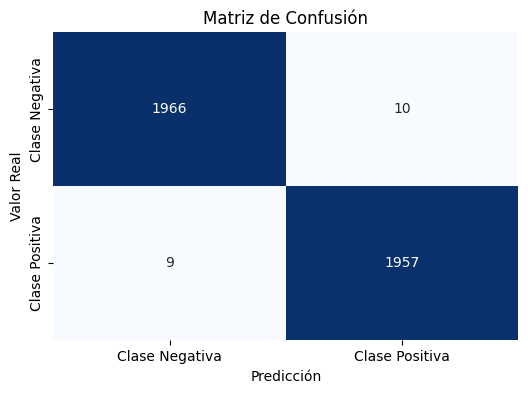

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### DECISION TREE

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_skip['Concatenado_total'].tolist()
y = df_ft_skip['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de división
    'max_depth': [None, 2, 5, 10],  # Profundidad máxima del árbol
    'min_samples_split': [4, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2, 4, 8]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9954337899543378
Precision: 0.9954343118294822
Recall: 0.9954337899543378
F-Score: 0.9954337946559242
Specificity: 0.9949392712550608


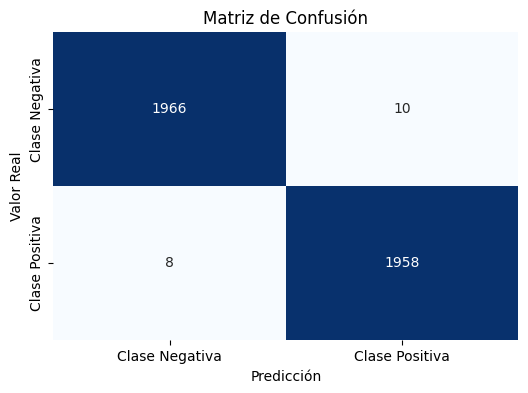

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### LOGISTIC REGRESSION

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_ft_skip['Concatenado_total'].tolist()
y = df_ft_skip['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
    'max_iter': [100, 500, 1000]  # Número máximo de iteraciones
}

# Crear un modelo de Regresión Logística
logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear', random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9776763064434297
Precision: 0.9776839462997343
Recall: 0.9776763064434297
F-Score: 0.9776760995701691
Specificity: 0.979757085020243


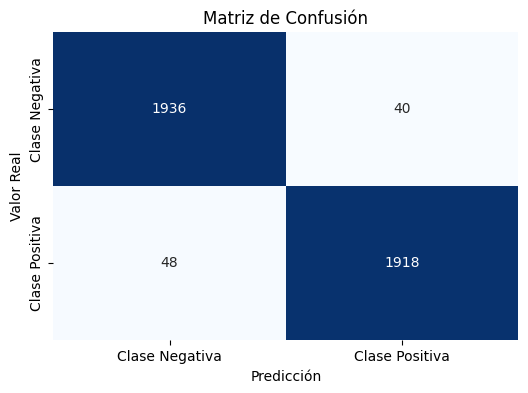

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

# FIN DEL CÓDIGO